In [1]:
%%capture
import numpy as np
import matplotlib.pyplot as plt
from planetdfq import Planet


In [11]:
earth_mass = 5.97e24 # kg
earth_radius = 6.3e4 # m
pa_to_atm = 1/9.86923e-6 # pa / atm

In [20]:
ig = Planet()
cp = 1.1e5
dr = 1e3
# under the ideal gas law, the pressure would never reach 0, so we need a stopping pressure
# that's a bit higher. The dp values are very small so I kept them pretty close to each other.
mass, radius, pressure = ig.calculateMRP(cp, dr, 300, max_steps = 1e5, stop_pressure = 1e5)

starting step 0
starting step 1000
starting step 2000
starting step 3000
starting step 4000
starting step 5000
starting step 6000
starting step 7000
starting step 8000
starting step 9000
starting step 10000
starting step 11000
starting step 12000
starting step 13000
starting step 14000
starting step 15000
starting step 16000
starting step 17000
starting step 18000
starting step 19000
starting step 20000
starting step 21000
starting step 22000
starting step 23000
starting step 24000
starting step 25000
starting step 26000
starting step 27000
starting step 28000
starting step 29000
starting step 30000
starting step 31000
starting step 32000
starting step 33000
starting step 34000
starting step 35000
starting step 36000
starting step 37000
starting step 38000
starting step 39000
starting step 40000
starting step 41000
starting step 42000
starting step 43000
starting step 44000
starting step 45000
starting step 46000
starting step 47000
starting step 48000
starting step 49000
starting step

In [21]:
print(len(pressure))

98838


Text(0.5, 0, 'radius (ER)')

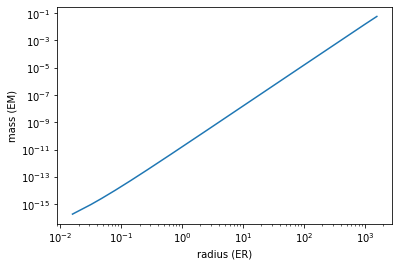

In [22]:
plt.plot(radius/earth_radius, mass/earth_mass)
plt.loglog()
plt.ylabel('mass (EM)')
plt.xlabel('radius (ER)')

Text(0.5, 0, 'radius (ER)')

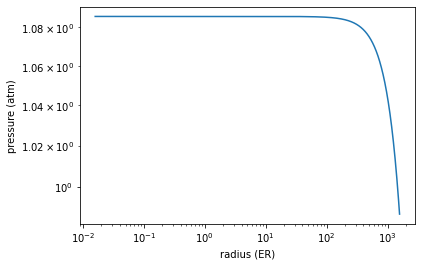

In [23]:
plt.plot(radius/earth_radius, pressure/pa_to_atm)
plt.loglog()
plt.ylabel('pressure (atm)')
plt.xlabel('radius (ER)')

In [26]:
%%capture
# above line captures the output print statements
# integrating over a bunch of central pressures for the radius - mass relationship
cps = np.linspace(1.0001e5, 1.1e5, 200)
surfR, totM = ig.integrateCP(cps, dr, 300, max_steps=1e5, stop_pressure=1e5)

Text(0, 0.5, 'radius (ER)')

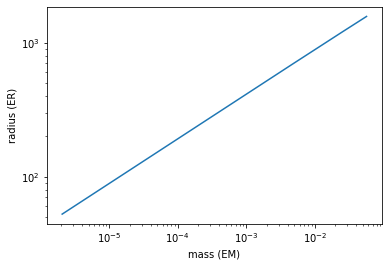

In [27]:
plt.plot(totM / earth_mass, surfR / earth_radius)
plt.loglog()
plt.xlabel('mass (EM)')
plt.ylabel('radius (ER)')